In [52]:
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

In [2]:
fruits

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [3]:
fruits.shape

(59, 7)

In [26]:
df = fruits[['mass','width','height','color_score']]
df

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79
5,80,5.8,4.3,0.77
6,80,5.9,4.3,0.81
7,76,5.8,4.0,0.81
8,178,7.1,7.8,0.92
9,172,7.4,7.0,0.89


<IPython.core.display.Javascript object>


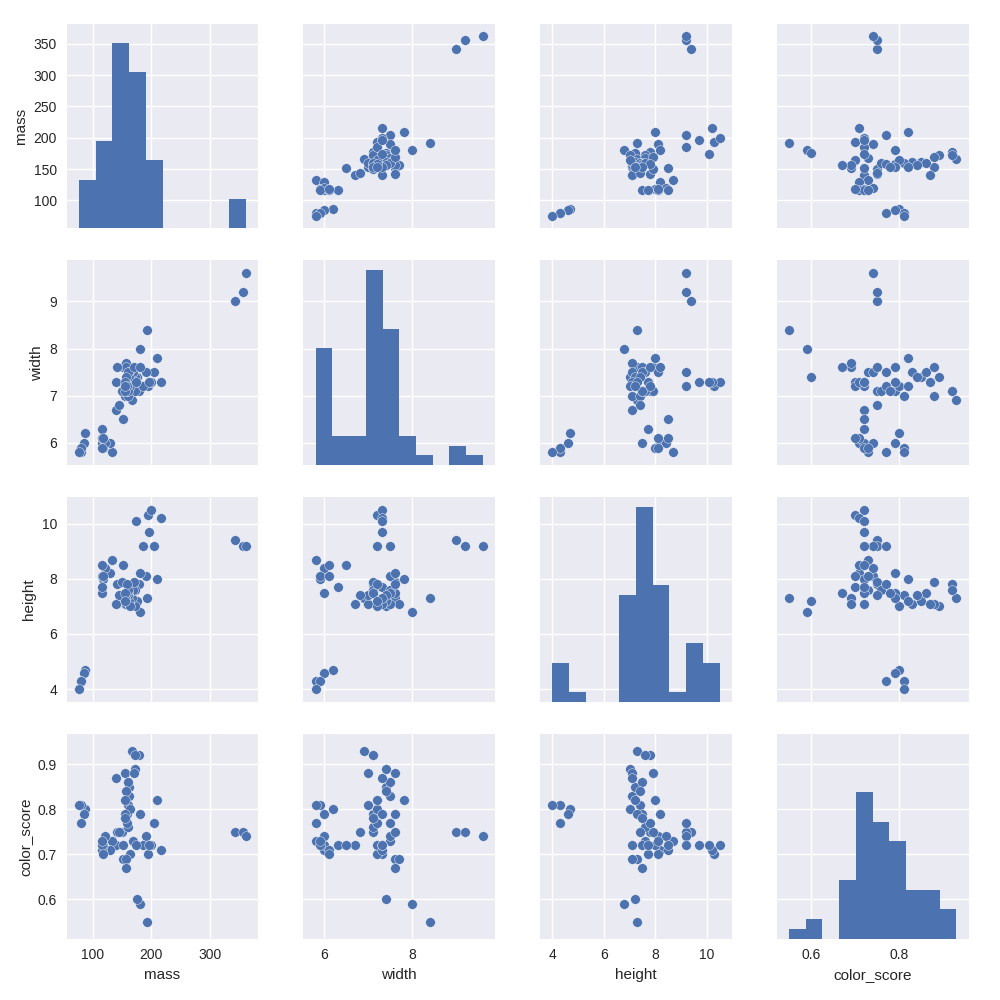

In [27]:
sns.pairplot(data=df)

In [9]:
#df.drop('color_score',inplace=True,axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
y = fruits['fruit_label']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(df,y, random_state=0)
#going to use 75/25 split train to test
#random_state just picks a specific rng seed
#just splits up the data into random 75/25 buckets. No magic yet

In [30]:
X_train

,mass,width,height,color_score
42,154,7.2,7.2,0.82
48,174,7.3,10.1,0.72
7,76,5.8,4.0,0.81
14,152,7.6,7.3,0.69
32,164,7.2,7.0,0.80
49,132,5.8,8.7,0.73
29,160,7.0,7.4,0.81
37,154,7.3,7.3,0.79
56,116,5.9,8.1,0.73
18,162,7.5,7.1,0.83


In [31]:
X_test

,mass,width,height,color_score
26,362,9.6,9.2,0.74
35,150,7.1,7.9,0.75
43,194,7.2,10.3,0.70
28,140,6.7,7.1,0.72
11,172,7.1,7.6,0.92
2,176,7.4,7.2,0.60
34,142,7.6,7.8,0.75
46,216,7.3,10.2,0.71
40,154,7.1,7.5,0.78
22,140,7.3,7.1,0.87


In [23]:
cm? #stands for colormap (OF THE SUN)

<IPython.core.display.Javascript object>


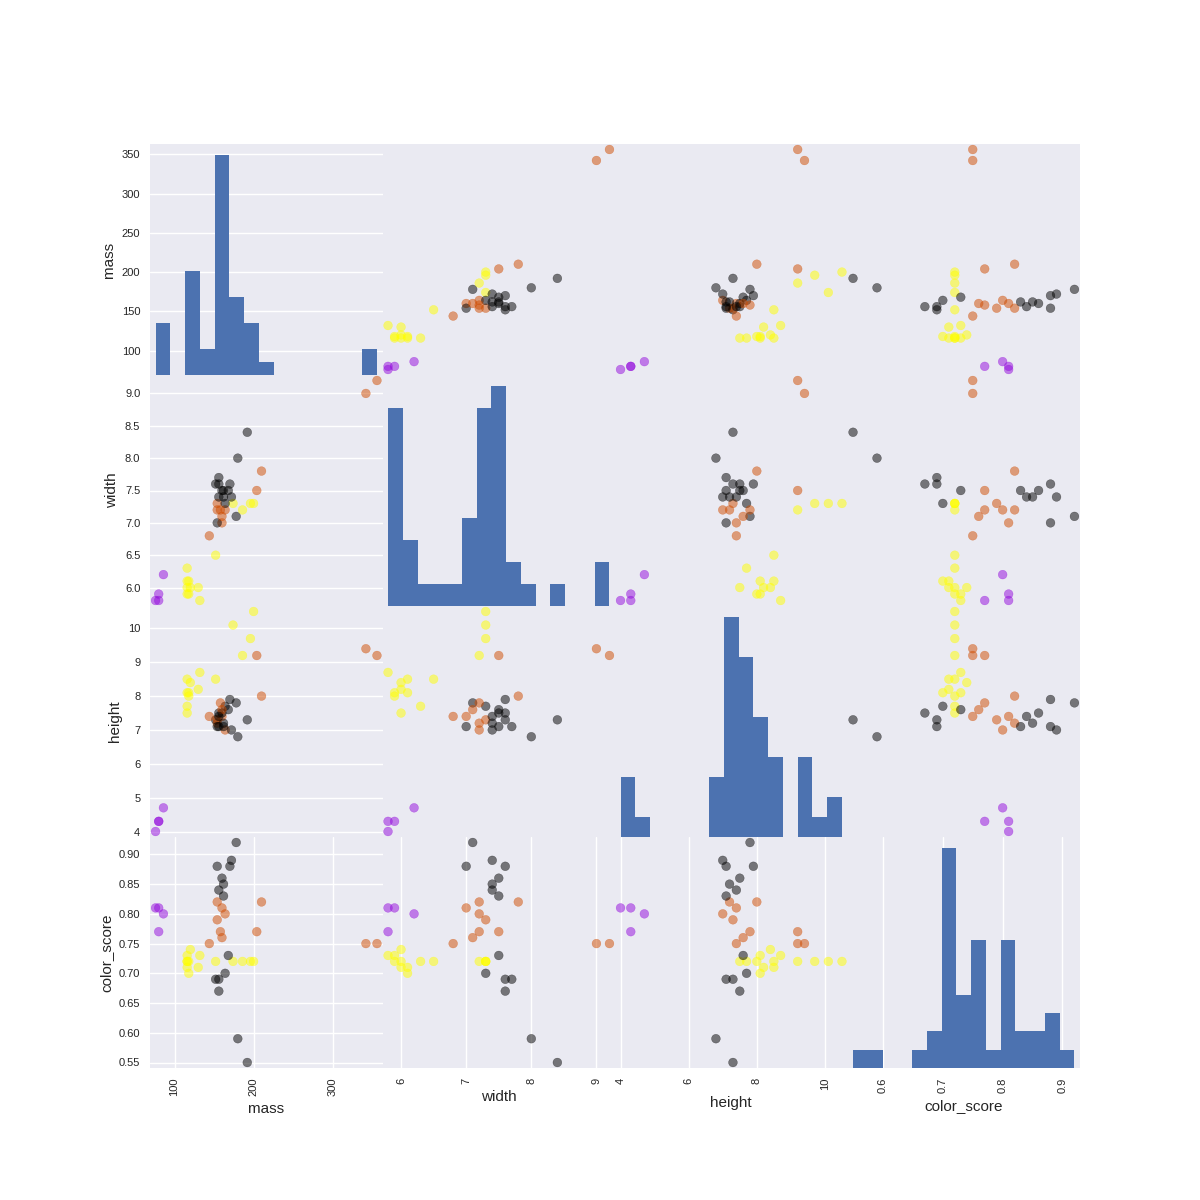

In [32]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c=y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap=cmap)

<IPython.core.display.Javascript object>


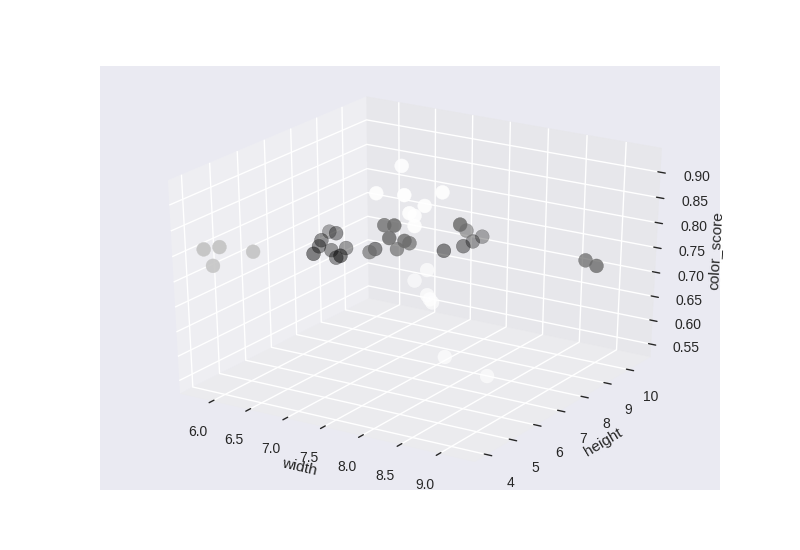

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'],X_train['color_score'],c=y_train,marker='o',s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')

In [35]:
#when checking for k nearest neighbors, a point in the test set can be considered in the 'shadow' of another, already labeled point 
#should be using an odd number for k to break ties 
#k nearest neighbors works because there is a known label for the datapoints in the training set 

In [36]:
#need four things for k nearest neighbors:
#  1 - a distance metric - straight line, euclidian distance
#  2 - how many nearest neighbors to look at? This is the k value
#  3 - Weighting function on the nearest points. For example, closer neighbors should have higher influence
#  4 - How to aggregate the classes of neighbor points. Usually just majority vote

In [37]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [53]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [54]:
fruits['fruit_label'] == fruits.fruit_label
# I could've been using this the whole time

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
53    True
54    True
55    True
56    True
57    True
58    True
Name: fruit_label, dtype: bool

In [55]:
X = fruits[['mass','width','height']] #features
y = fruits['fruit_label'] #the labels, i.e. what we're trying to predict

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
# tuple unpacking

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
#this is the module doing the learning

In [59]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [60]:
knn.fit(X_train,y_train)
#feed it the training cases

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
# create the classifier
# fit the data
# test it on the test data

In [61]:
knn.score(X_test,y_test)
#accuracy estimation 

0.53333333333333333

In [62]:
fruit_prediction = knn.predict([[20,4.3,5.5]]) #random peice of fruit

In [63]:
fruit_prediction

array([2])

In [65]:
lookup_fruit_name[fruit_prediction[0]]
#what did the two in that array mean? we mapped it with the dictionary before

'mandarin'

In [66]:
#plot it
from adspy_shared_utilities import plot_fruit_knn
#is this a module specifically made for plotting fruit...?

<IPython.core.display.Javascript object>


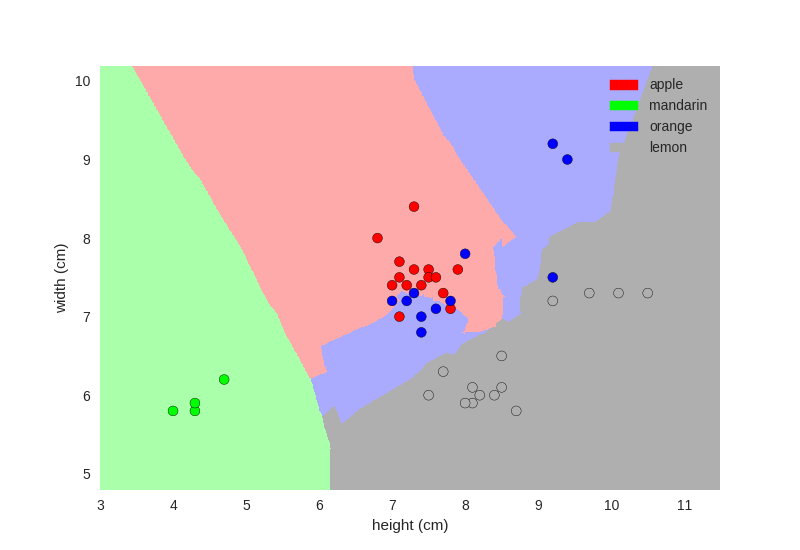

In [67]:
plot_fruit_knn(X_train,y_train, 5, 'uniform')
# 5 is the k number
# uniform is the weight for neighbors. Another option is 'distance' which would weight closer neighbors higher

<IPython.core.display.Javascript object>


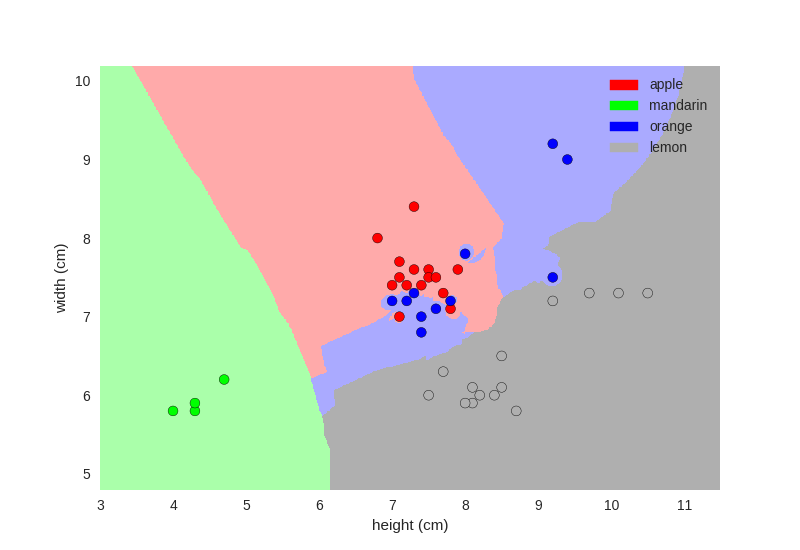

In [68]:
plot_fruit_knn(X_train,y_train, 5, 'distance')

In [69]:
plot_fruit_knn?

In [ ]:
# Read the dataset - clean your data
# Plot the data - eyeball it 
# Train test split - separate your data into training and testing sets
# Create a classifier - beep boop robot that you're going to teach what a mandarin is
# Use the classifier to fit the data - feed its robot brain some numbers 
# Use the classifier to predict the data - knn.predict whether you've got a mandarin or a tennis ball